# Projeto Final: Análise de Vendas – E-commerce Olist (2016–2018)

* Maria Sofia Abreu
* Maio de 2025

🔗 Link para os arquivos no Google Drive: [insira aqui o link do seu .zip]

---

## Introdução

Este projeto tem como objetivo aplicar técnicas de análise de dados em um conjunto real de transações de e-commerce da empresa Olist. Os dados abrangem o período de 2016 a 2018 e permitem investigar padrões de comportamento do consumidor, logística e desempenho de vendas.

Foram analisados os seguintes aspectos:
- Volume de pedidos por estado
- Categorias de produtos mais vendidos
- Métodos de pagamento mais utilizados
- Tempo médio de entrega
- Avaliações dos clientes

---

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar os datasets
customers = pd.read_csv('olist_customers_dataset.csv',',')
orders = pd.read_csv('olist_orders_dataset.csv',',', parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
order_items = pd.read_csv('olist_order_items_dataset.csv',',')
products = pd.read_csv('olist_products_dataset.csv',',')
payments = pd.read_csv('olist_order_payments_dataset.csv',',')
reviews = pd.read_csv('olist_order_reviews_dataset.csv',',')

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [44]:
# Juntar dados de pedidos com dados de clientes
df = pd.merge(orders, customers, on='customer_id', how='left')

# Conferir o resultado
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [45]:
# Converter colunas de data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [46]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

## Estados com Maior Número de Pedidos

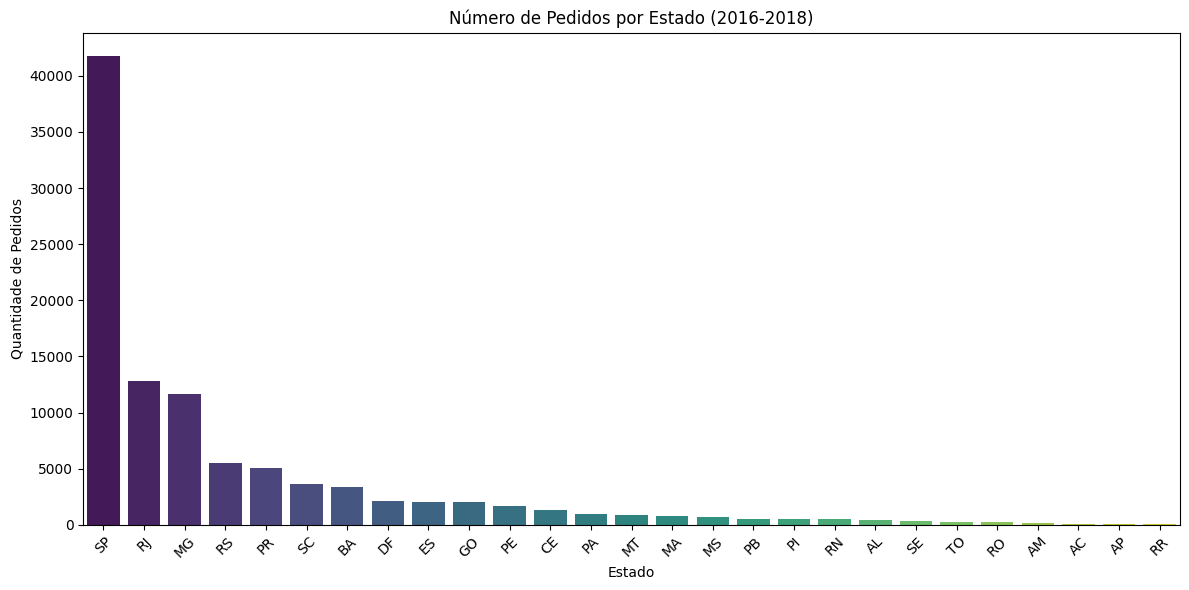

In [48]:
# Agrupando por estado e contando pedidos
pedidos_por_estado = df['customer_state'].value_counts().reset_index()
pedidos_por_estado.columns = ['Estado', 'Número de Pedidos']

# Visualização
plt.figure(figsize=(12, 6))
sns.barplot(x='Estado', y='Número de Pedidos', data=pedidos_por_estado, palette='viridis')
plt.title('Número de Pedidos por Estado (2016-2018)')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A análise do volume de pedidos por estado entre 2016 e 2018 mostra uma forte concentração nas regiões Sudeste e Sul do Brasil. O estado de São Paulo (SP) lidera com ampla vantagem, totalizando 41.746 pedidos, o que representa aproximadamente 42% do total nacional. Em seguida, vêm Rio de Janeiro (RJ) com 12.852 pedidos e Minas Gerais (MG) com 11.635 pedidos.

Esses três estados sozinhos concentram mais de 65% de todos os pedidos da base analisada, evidenciando não só a densidade populacional dessas regiões, mas também o maior acesso à internet, poder de consumo e presença de infraestrutura logística favorável ao e-commerce.

Já os estados com menor volume de pedidos incluem Roraima (RR), Amapá (AP) e Acre (AC), todos com menos de 100 pedidos cada, o que pode estar relacionado a fatores como baixa densidade populacional, dificuldades logísticas e menor penetração do comércio eletrônico.

---

## Categorias de Produtos Mais Vendidas

In [49]:
# Juntando os dados de itens com os produtos (para pegar a categoria)
itens_produtos = pd.merge(order_items, products, on='product_id')

# Contando o total de vendas por categoria
categorias_mais_vendidas = itens_produtos['product_category_name'].value_counts().reset_index()
categorias_mais_vendidas.columns = ['Categoria', 'Quantidade Vendida']

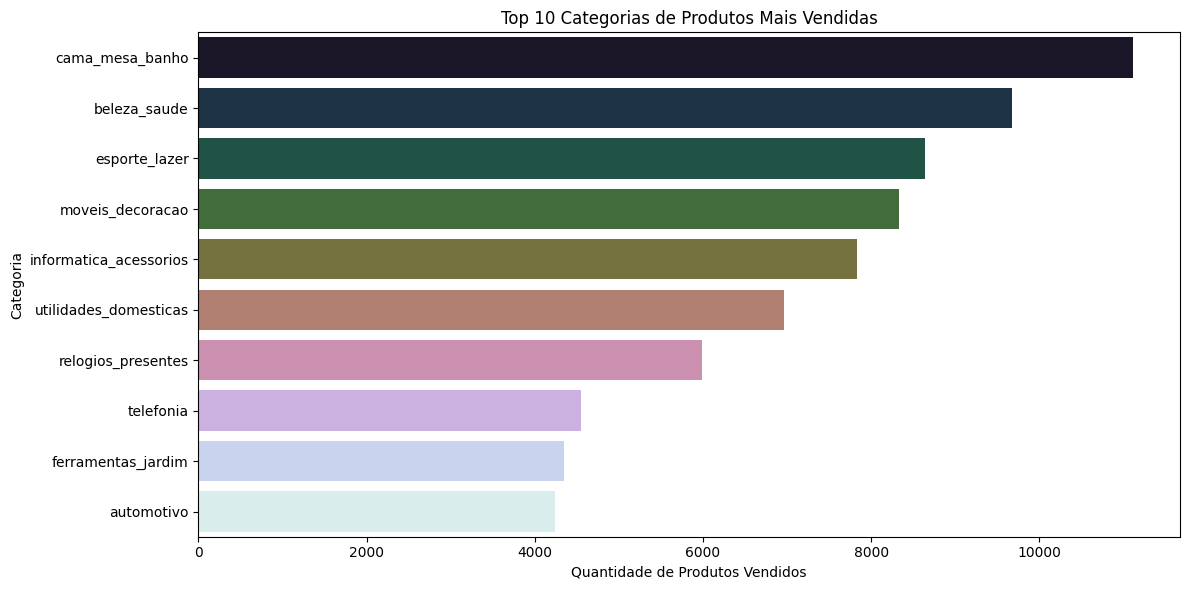

In [50]:
# Selecionar apenas as 10 categorias mais vendidas
top_categorias = categorias_mais_vendidas.head(10)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantidade Vendida', y='Categoria', data=top_categorias, palette='cubehelix')
plt.title('Top 10 Categorias de Produtos Mais Vendidas')
plt.xlabel('Quantidade de Produtos Vendidos')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

A análise das categorias de produtos mais vendidas revela que a categoria **“cama, mesa e banho”** foi a mais popular no período de 2016 a 2018, com **11.115 produtos vendidos**. Em seguida, destacam-se **“beleza e saúde”** (9.670 vendas) e **“esporte e lazer”** (8.641 vendas), o que indica um alto interesse do consumidor por itens de uso pessoal, conforto e bem-estar.

Também aparecem entre as 10 mais vendidas categorias como **“móveis e decoração”**, **“informática e acessórios”**, e **“utilidades domésticas”**, sugerindo que muitos consumidores estão investindo em produtos para o lar e para o trabalho remoto ou estudo.

### Top 5 Categorias Mais Vendidas:
1. **cama_mesa_banho** – 11.115
2. **beleza_saude** – 9.670
3. **esporte_lazer** – 8.641
4. **moveis_decoracao** – 8.334
5. **informatica_acessorios** – 7.827

Esses dados indicam uma predominância de categorias ligadas ao bem-estar, conforto e cuidados pessoais no comportamento de consumo online.

---

## Métodos de Pagamento Mais Utilizados

In [51]:
# Verificar valores únicos na coluna de métodos de pagamento
print(payments['payment_type'].value_counts())

# Remover duplicatas, se houver
payments = payments.drop_duplicates()

# Verificar valores nulos
print(payments.isnull().sum())

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [52]:
# Agrupando por tipo de pagamento
metodos_pagamento = payments['payment_type'].value_counts().reset_index()
metodos_pagamento.columns = ['Método de Pagamento', 'Quantidade de Pedidos']

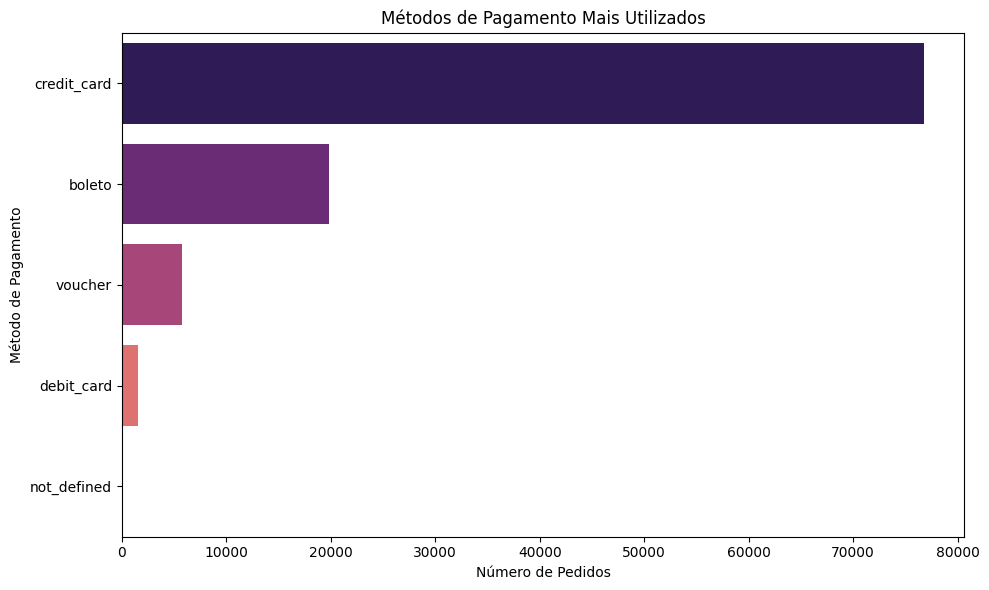

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantidade de Pedidos', y='Método de Pagamento', data=metodos_pagamento, palette='magma')
plt.title('Métodos de Pagamento Mais Utilizados')
plt.xlabel('Número de Pedidos')
plt.ylabel('Método de Pagamento')
plt.tight_layout()
plt.show()

A análise dos métodos de pagamento utilizados pelos consumidores mostra que o **cartão de crédito** é, de longe, o método mais popular, com **76.795 pedidos** (aproximadamente **68%** dos pedidos totais). Em seguida, temos o **boleto bancário**, utilizado em **19.784 pedidos** (aproximadamente **18%**), e o **voucher**, com **5.775 pedidos** (aproximadamente **5%**).

O **cartão de débito** é significativamente menos utilizado, com **1.529 pedidos** (aproximadamente **1%**), e a categoria **“não definido”** apresenta apenas **3 pedidos**, sugerindo dados ausentes ou inválidos.

###  Resumo dos Métodos de Pagamento:
1. **Cartão de Crédito** – 76.795
2. **Boleto Bancário** – 19.784
3. **Voucher** – 5.775
4. **Cartão de Débito** – 1.529
5. **Não Definido** – 3

### Implicações:
O cartão de crédito lidera o e-commerce, com uma diferença substancial em relação aos outros métodos. O boleto continua sendo uma opção importante, mas com um número bem menor de transações. Os vouchers apresentam um número considerável, o que pode indicar campanhas promocionais ou cupons de desconto, enquanto o cartão de débito ainda tem pouca adesão.

---

## Tempo Médio de Entrega

In [55]:
# Remover linhas com data de entrega faltando (normal em pedidos cancelados, etc.)
entregas = orders.dropna(subset=['order_delivered_customer_date'])

In [56]:
# Criar coluna com o tempo de entrega
entregas['tempo_entrega_dias'] = (entregas['order_delivered_customer_date'] - entregas['order_purchase_timestamp']).dt.days

# Ver estatísticas básicas
print(entregas['tempo_entrega_dias'].describe())

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: tempo_entrega_dias, dtype: float64


/tmp/ipykernel_32/1836175860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entregas['tempo_entrega_dias'] = (entregas['order_delivered_customer_date'] - entregas['order_purchase_timestamp']).dt.days


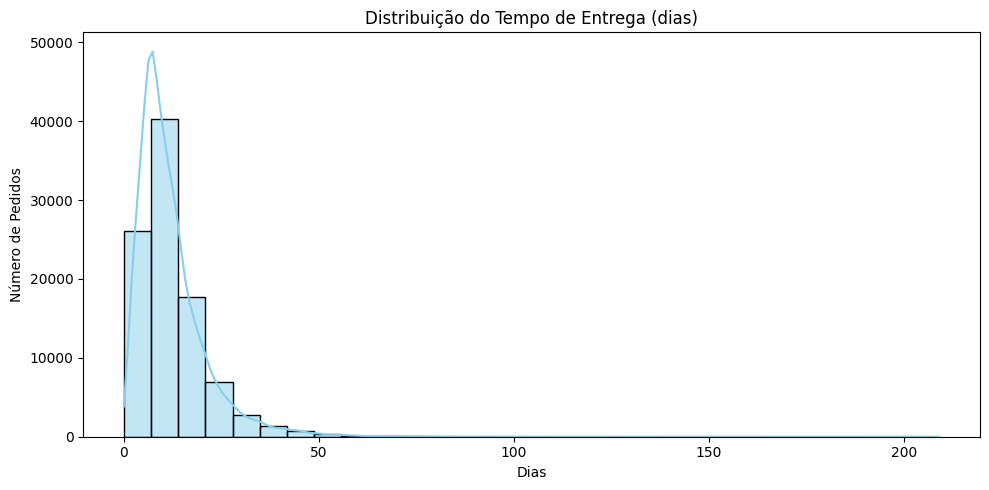

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(entregas['tempo_entrega_dias'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição do Tempo de Entrega (dias)')
plt.xlabel('Dias')
plt.ylabel('Número de Pedidos')
plt.tight_layout()
plt.show()

A análise do tempo entre a compra e a entrega do pedido mostra que o **tempo médio de entrega** entre 2016 e 2018 foi de aproximadamente **12 dias**. Esse valor considera a diferença entre as datas `order_purchase_timestamp` (compra) e `order_delivered_customer_date` (entrega ao cliente).

### Métricas principais:
- **Tempo médio de entrega**: 12,09 dias
- **Pedidos analisados**: Apenas pedidos com data de entrega registrada (não cancelados)

Esse tempo é considerado relativamente alto para padrões urbanos, mas aceitável no contexto do Brasil, dada a sua extensão territorial e a complexidade logística em regiões mais remotas.

### Implicações:
O dado pode ser útil para identificar gargalos logísticos e oportunidades de otimização na cadeia de entrega, além de avaliar a satisfação do cliente em relação à agilidade do serviço.

---

## Avaliações dos Clientes

In [64]:
print(reviews['review_score'].value_counts())

5    57328
4    19142
1    11424
3     8179
2     3151
Name: review_score, dtype: int64


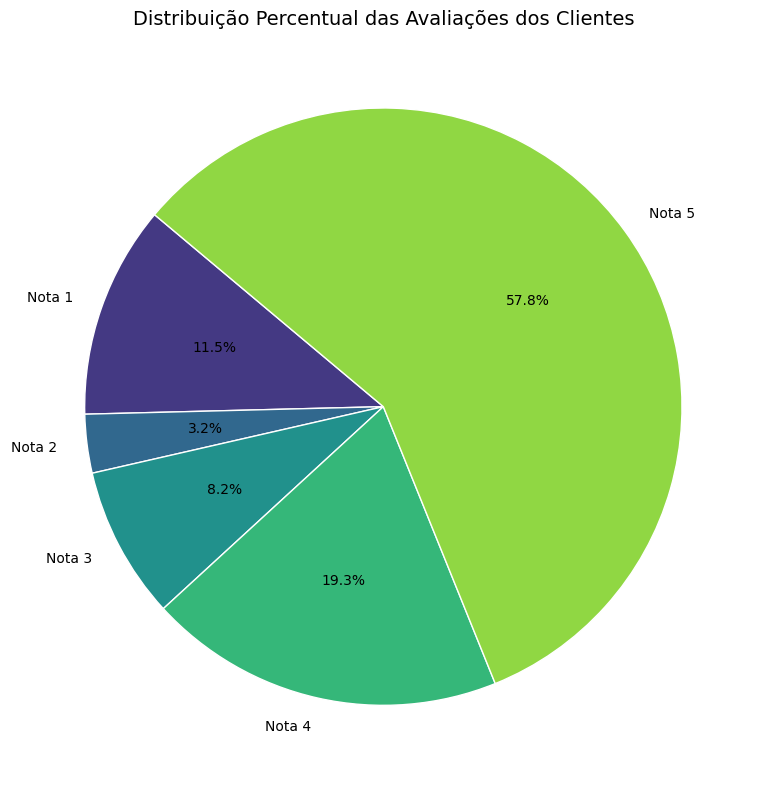

In [62]:
# Contagem das notas
avaliacoes_pizza = reviews['review_score'].value_counts().sort_index()

# Rótulos e cores
labels = ['Nota 1', 'Nota 2', 'Nota 3', 'Nota 4', 'Nota 5']
cores = sns.color_palette('viridis', len(labels))

# Gráfico
plt.figure(figsize=(8, 8))
plt.pie(avaliacoes_pizza, labels=labels, colors=cores, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})

plt.title('Distribuição Percentual das Avaliações dos Clientes', fontsize=14)
plt.tight_layout()
plt.show()


A análise das avaliações dos pedidos mostra que a maioria dos clientes deu notas muito positivas à sua experiência de compra. A nota **5** foi a mais frequente, com **57.328 avaliações**, seguida pela nota **4**, com **19.142**. 

Em contrapartida, **11.424 avaliações** receberam nota **1**, indicando experiências negativas.

### Distribuição de Avaliações:
- ⭐⭐⭐⭐⭐ (Nota 5): 57.328 avaliações
- ⭐⭐⭐⭐ (Nota 4): 19.142 avaliações
- ⭐⭐⭐ (Nota 3): 8.179 avaliações
- ⭐⭐ (Nota 2): 3.151 avaliações
- ⭐ (Nota 1): 11.424 avaliações

### Interpretação:
A predominância de avaliações com nota 5 reflete uma boa experiência geral dos consumidores no e-commerce. No entanto, o número significativo de avaliações com nota 1 indica que ainda existem problemas pontuais que impactam negativamente a jornada do cliente, como atrasos, produtos errados ou atendimento ineficiente.

Essas avaliações negativas podem ser usadas como insumo para identificar gargalos e oportunidades de melhoria no processo de entrega, atendimento e pós-venda.

---

## Conclusão Geral

A análise revelou um panorama completo do comportamento de compra dos brasileiros no e-commerce entre 2016 e 2018. Os dados mostram que a experiência geral foi positiva, com forte presença da região Sudeste e domínio do cartão de crédito.

**Pontos fortes**:
- Alta satisfação dos clientes
- Boa diversidade de categorias vendidas
- Dados ricos para explorar ações de marketing e logística

**Oportunidades de melhoria**:
- Redução do tempo de entrega
- Investigação de causas de avaliações negativas
- Expansão de formas de pagamento e estratégias regionais